 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [11]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
from torchsummary import summary

import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
from tqdm import notebook

Скачаем обучающую и контрольную выборки.

In [12]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=None)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=None)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot|

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
classes

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [14]:
print(len(trainset))  # количество картинок в train
print(len(testset))   # количество картинок в test

60000
10000


In [15]:
# Проверим равномерное ли распределение объектов разных классов в train датасете
# Это можно сделать, посчитав количество объектов каждого класса
class_counts = {}
for _, label in trainset:
    if label not in class_counts:
        class_counts[label] = 1
    else:
        class_counts[label] += 1

print(class_counts)

{9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}


In [16]:
pd_testset = pd.DataFrame(testset.targets.numpy())
for i in range(10):
  print('Class ', i, ': ', (pd_testset == i).sum())

Class  0 :  0    1000
dtype: int64
Class  1 :  0    1000
dtype: int64
Class  2 :  0    1000
dtype: int64
Class  3 :  0    1000
dtype: int64
Class  4 :  0    1000
dtype: int64
Class  5 :  0    1000
dtype: int64
Class  6 :  0    1000
dtype: int64
Class  7 :  0    1000
dtype: int64
Class  8 :  0    1000
dtype: int64
Class  9 :  0    1000
dtype: int64


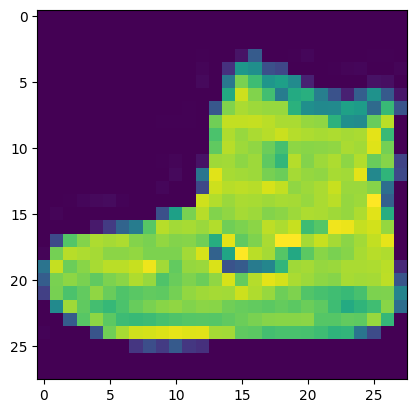

In [17]:
plt.imshow(trainset.data[0])

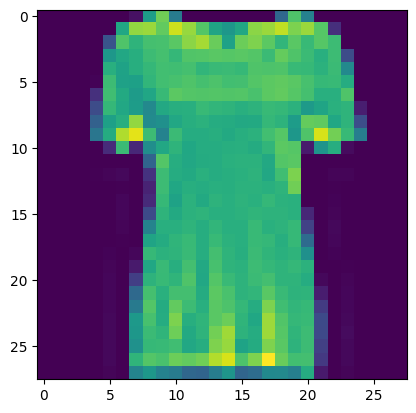

In [18]:
plt.imshow(trainset.data[10])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import notebook
import matplotlib.pyplot as plt
import torchvision

# Определение устройства
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Определение модели
MLP_net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
).to(device)

# Определение функции потерь и оптимизатора
loss_fn = nn.CrossEntropyLoss()

# Adjust learning rate
learning_rate = 1e-3
optimizer = optim.Adam(MLP_net.parameters(), lr=learning_rate)

# Adjust scheduler parameters
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# Обновление DataLoader с использованием аугментации данных
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# Adjust batch size
trainloader = DataLoader(trainset, batch_size=256, shuffle=True)

# Обучение
num_epochs = 15
loss_history = []

for epoch in notebook.tqdm(range(num_epochs)):
    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):
        X_batch, y_batch = batch
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = MLP_net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 2000 == 1999:
            loss_history.append(running_loss / 2000)
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    # Step the scheduler at the end of each epoch
    scheduler.step()

# Оценка точности на тестовом наборе данных
class_correct = list(0. for _ in range(10))
class_total = list(0. for _ in range(10))

# Assuming you have a testloader defined somewhere in your code
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        y_pred = MLP_net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

In [26]:
for i in range(10):
    print('Accuracy of %5s : %2d%%' % (classes[i], 100 * class_correct[i] / class_total[i]))

overall_accuracy = (sum(class_correct) / sum(class_total)) * 100
print('\nOverall Accuracy: %.2f%%' % overall_accuracy)

Accuracy of T-shirt/top : 81%
Accuracy of Trouser : 96%
Accuracy of Pullover : 75%
Accuracy of Dress : 87%
Accuracy of  Coat : 83%
Accuracy of Sandal : 95%
Accuracy of Shirt : 59%
Accuracy of Sneaker : 94%
Accuracy of   Bag : 96%
Accuracy of Ankle boot : 95%

Overall Accuracy: 86.68%


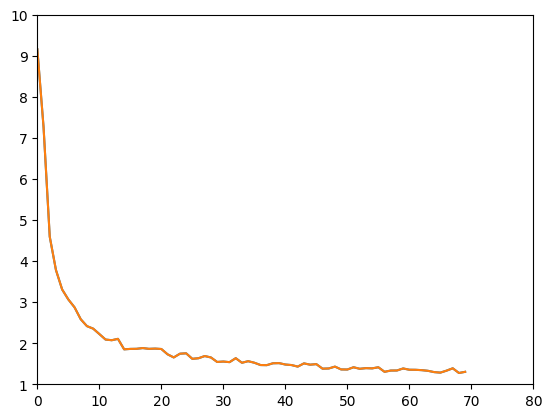

In [ ]:
plt.plot(loss_history, label='loss')
plt.plot(loss_history, label='loss')
plt.ylim(1, 10)
plt.xlim(0, 80)
plt.show()
plt.show()

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        # вызов конструктора класса nn.Module()
        super(ConvNet, self).__init__()

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)

        self.fc1 = nn.Linear(2 * 2 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(self.conv3(F.relu(self.conv2(x))))
        x = x.view(-1, 2 * 2 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# объявление сети
conv_net = ConvNet()
conv_net.to(device)

# выбор функции потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбор алгоритма оптимизации и learning_rate
learning_rate = 1e-4
optimizer = torch.optim.Adam(conv_net.parameters(), lr=learning_rate)
summary(conv_net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
            Conv2d-4             [-1, 32, 4, 4]          12,832
         MaxPool2d-5             [-1, 32, 2, 2]               0
            Linear-6                  [-1, 120]          15,480
            Linear-7                   [-1, 84]          10,164
            Linear-8                   [-1, 10]             850
Total params: 41,898
Trainable params: 41,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.16
Estimated Total Size (MB): 0.21
----------------------------------------------------------------


In [ ]:
# итерирование
cnn_loss_history = []

for epoch in notebook.tqdm(range(10)):

    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):
        # получение текущего батча
        X_batch, y_batch = batch
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # обнуление весов
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = conv_net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # вывод текущего loss
        running_loss += loss.item()


        # вывод качества каждые 2000 батчей
        if i % 2000 == 1999:
            cnn_loss_history.append(running_loss / 2000)

            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('END')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.287
[1,  4000] loss: 0.917
[1,  6000] loss: 0.838
[1,  8000] loss: 0.767
[1, 10000] loss: 0.710
[1, 12000] loss: 0.673
[1, 14000] loss: 0.648


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.622
[2,  4000] loss: 0.613
[2,  6000] loss: 0.582
[2,  8000] loss: 0.585
[2, 10000] loss: 0.546
[2, 12000] loss: 0.558
[2, 14000] loss: 0.520


  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  2000] loss: 0.509
[3,  4000] loss: 0.509
[3,  6000] loss: 0.497
[3,  8000] loss: 0.500
[3, 10000] loss: 0.482
[3, 12000] loss: 0.472
[3, 14000] loss: 0.474


  0%|          | 0/15000 [00:00<?, ?it/s]

[4,  2000] loss: 0.456
[4,  4000] loss: 0.447
[4,  6000] loss: 0.448
[4,  8000] loss: 0.451
[4, 10000] loss: 0.431
[4, 12000] loss: 0.437
[4, 14000] loss: 0.420


  0%|          | 0/15000 [00:00<?, ?it/s]

[5,  2000] loss: 0.411
[5,  4000] loss: 0.403
[5,  6000] loss: 0.397
[5,  8000] loss: 0.404
[5, 10000] loss: 0.397
[5, 12000] loss: 0.402
[5, 14000] loss: 0.398


  0%|          | 0/15000 [00:00<?, ?it/s]

[6,  2000] loss: 0.367
[6,  4000] loss: 0.383
[6,  6000] loss: 0.371
[6,  8000] loss: 0.364
[6, 10000] loss: 0.377
[6, 12000] loss: 0.377
[6, 14000] loss: 0.358


  0%|          | 0/15000 [00:00<?, ?it/s]

[7,  2000] loss: 0.345
[7,  4000] loss: 0.358
[7,  6000] loss: 0.360
[7,  8000] loss: 0.358
[7, 10000] loss: 0.356
[7, 12000] loss: 0.333
[7, 14000] loss: 0.339


  0%|          | 0/15000 [00:00<?, ?it/s]

[8,  2000] loss: 0.339
[8,  4000] loss: 0.328
[8,  6000] loss: 0.343
[8,  8000] loss: 0.326
[8, 10000] loss: 0.320
[8, 12000] loss: 0.327
[8, 14000] loss: 0.347


  0%|          | 0/15000 [00:00<?, ?it/s]

[9,  2000] loss: 0.331
[9,  4000] loss: 0.321
[9,  6000] loss: 0.327
[9,  8000] loss: 0.314
[9, 10000] loss: 0.309
[9, 12000] loss: 0.321
[9, 14000] loss: 0.304


  0%|          | 0/15000 [00:00<?, ?it/s]

[10,  2000] loss: 0.285
[10,  4000] loss: 0.311
[10,  6000] loss: 0.312
[10,  8000] loss: 0.298
[10, 10000] loss: 0.306
[10, 12000] loss: 0.304
[10, 14000] loss: 0.306
END


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        y_pred = conv_net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d%%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

print('\nOverall cccuracy: ', (sum(class_correct) / sum(class_total)) * 100, '%')

Accuracy of T-shirt/top : 83%
Accuracy of Trouser : 96%
Accuracy of Pullover : 85%
Accuracy of Dress : 91%
Accuracy of  Coat : 80%
Accuracy of Sandal : 97%
Accuracy of Shirt : 59%
Accuracy of Sneaker : 93%
Accuracy of   Bag : 97%
Accuracy of Ankle boot : 95%

Overall cccuracy:  88.03 %


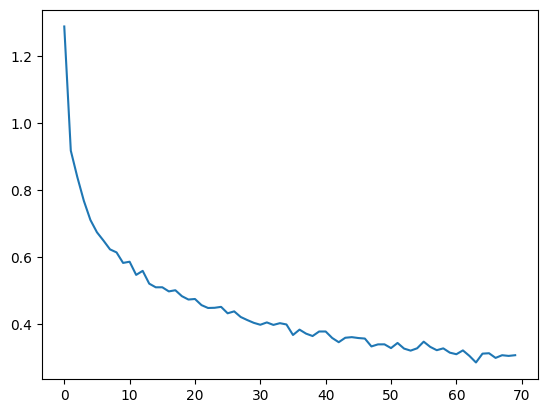

In [ ]:
plt.plot(cnn_loss_history, label='loss')